<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/03_42_PCA_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

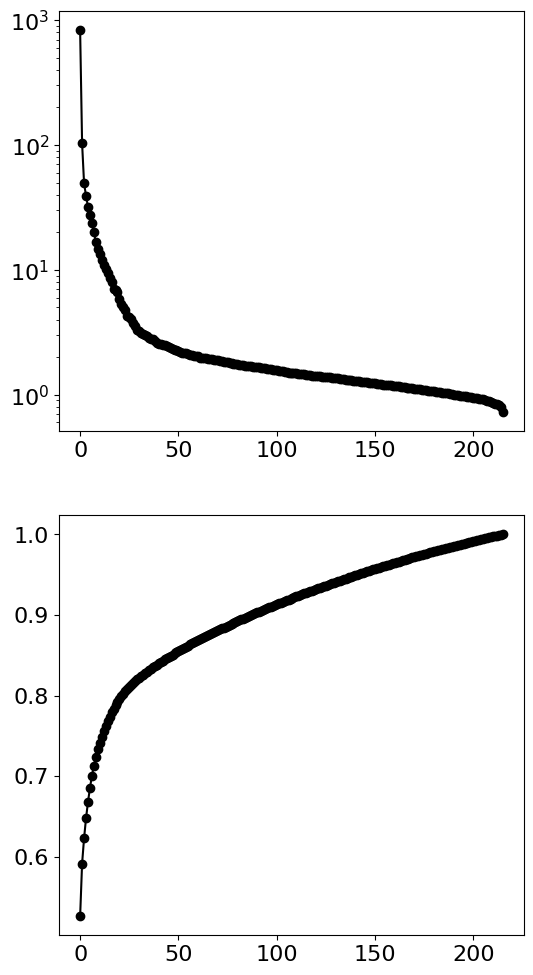

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [6, 12]
plt.rcParams.update({'font.size': 16})


# URL of the observation data
obs_file_url = 'https://raw.githubusercontent.com/kursatkara/MAE_5020_S24/master/Data/ovariancancer_obs.csv'


# Reading the numerical observation data directly from the URL
obs = np.genfromtxt(obs_file_url, delimiter=',')


# URL of the non-numerical data (group information: Cancer or No Cancer)
grp_file_url = 'https://raw.githubusercontent.com/kursatkara/MAE_5020_S24/master/Data/ovariancancer_grp.csv'
grp_df = pd.read_csv(grp_file_url, header=None)
grp = grp_df[0].values  # Convert the DataFrame column to a NumPy array


# SVD
U, S, VT = np.linalg.svd(obs,full_matrices=0)


#Plot the singular values and cumulative sum of singular values.
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(212)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

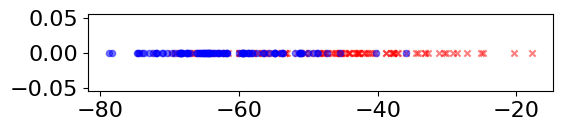

In [14]:
# The first principal component

plt.rcParams['figure.figsize'] = [6, 1]
plt.rcParams.update({'font.size': 16})

fig2 = plt.figure()
ax = fig2.add_subplot(111)

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T

    if grp[j] == 'Cancer':
        plt.scatter(x, 0, alpha=0.5, marker='x',color='r',s=20)
    else:
        plt.scatter(x, 0, alpha=0.5, marker='o',color='b',s=20)
plt.show()

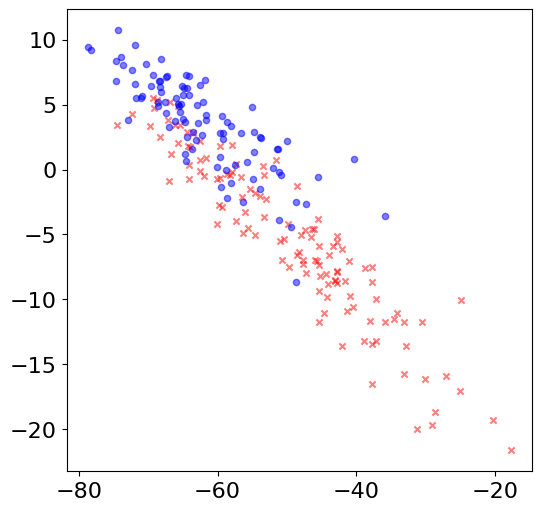

In [15]:
# The first and second principal components

plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 16})

fig3 = plt.figure()
ax = fig3.add_subplot(111)

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T

    if grp[j] == 'Cancer':
        ax.scatter(x, y, alpha=0.5, marker='x',color='r',s=20)
    else:
        ax.scatter(x, y, alpha=0.5, marker='o',color='b',s=20)
plt.show()

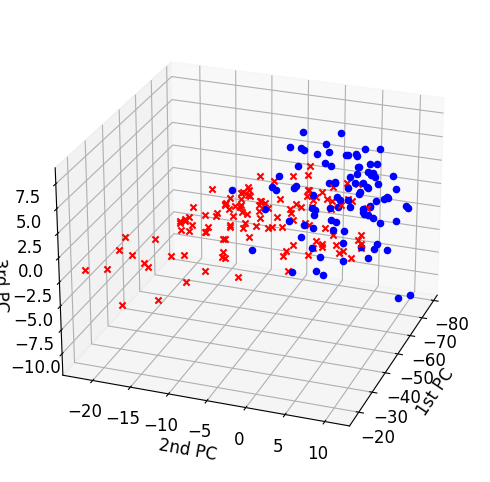

In [17]:
# The first three principal components
fig4 = plt.figure()
ax = fig4.add_subplot(111, projection='3d')
#plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 12})

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T

    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=20)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=20)

ax.view_init(25, 20)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')

plt.show()